### Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eva/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/s

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

### EDA

In [3]:
data = pd.read_csv("bq-data.csv")
data['avg_monetary'] = data['monetary'] / data['frequency']
data.head(10)

,user_id,frequency,monetary,avg_monetary
0,110800200,11,40.40,3.672727
1,46288512,19,86.10,4.531579
2,112689466,17,63.10,3.711765
3,26191480,18,79.60,4.422222
4,62822890,15,62.40,4.160000
5,69181010,13,56.75,4.365385
6,14086488,15,57.50,3.833333
7,72156842,14,57.70,4.121429
8,89998448,15,45.50,3.033333
9,184263810,17,81.80,4.811765


In [4]:
data.describe()

,user_id,frequency,monetary,avg_monetary
count,1.629540e+05,162954.000000,162954.000000,162954.000000
mean,8.210683e+07,2.454680,21.412674,9.747316
std,5.623636e+07,2.306284,20.115454,6.353506
min,2.746200e+04,1.000000,0.000000,0.000000
25%,3.619502e+07,1.000000,8.400000,5.500000
50%,7.306845e+07,2.000000,15.200000,8.100000
75%,1.126347e+08,3.000000,27.400000,12.300000
max,1.982852e+08,33.000000,449.050000,134.500000


In [5]:
data.shape[0]

162954

/home/eva/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/eva/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


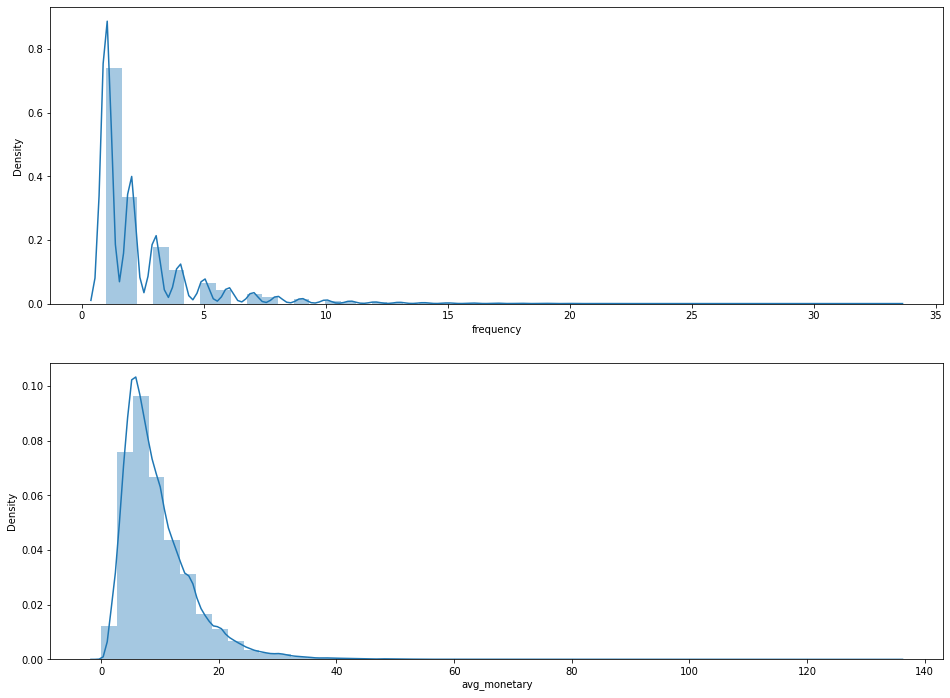

In [6]:
plt.subplot(2, 1, 1);
sns.distplot(data['frequency'])
plt.subplot(2, 1, 2);
sns.distplot(data['avg_monetary'])
plt.show()

## RFM

In [8]:
def rfm(freq_bins, mon_bins, data, weight=(0.5, 0.5)):
    labels = range(1, len(freq_bins))
    data['F'] = pd.cut(data['frequency'], bins=freq_bins, labels=labels)
    labels = range(1, len(mon_bins))
    data['M'] = pd.cut(data['avg_monetary'], bins=mon_bins, labels=labels)
    data = data.dropna()
    return data

In [9]:
def get_RFM_tier(row):
    segment = str(row['Concat_Segments'])
    f, m = segment
    f = int(f)
    m = int(m)
    if segment in ['55','45', '54','44']:
        return 'The Best'
    elif f > 3:
        return 'Loyal'
    elif m > 3:
        return 'Big Spender'
    elif f == 3 and m == 3:
        return 'Needs Attention'
    elif f == 3:
        return 'Potential Loyal'
    elif m == 3:
        return 'Potential Big Spender'
    else:
        return 'On diet'

In [10]:
data = rfm([0, 2, 4, 6, 10, 33], [0, 3, 6, 10, 15, 135], data)
data.head(10)

,user_id,frequency,monetary,avg_monetary,F,M
0,110800200,11,40.40,3.672727,5,2
1,46288512,19,86.10,4.531579,5,2
2,112689466,17,63.10,3.711765,5,2
3,26191480,18,79.60,4.422222,5,2
4,62822890,15,62.40,4.160000,5,2
5,69181010,13,56.75,4.365385,5,2
6,14086488,15,57.50,3.833333,5,2
7,72156842,14,57.70,4.121429,5,2
8,89998448,15,45.50,3.033333,5,2
9,184263810,17,81.80,4.811765,5,2


In [11]:
def join_rfm(x): 
    return str(int(x['F'])) + str(int(x['M']))

In [15]:
data['Concat_Segments'] = data.apply(join_rfm, axis=1)
data['Segment'] = data.apply(get_RFM_tier, axis=1)
data.head(10)

,user_id,frequency,monetary,avg_monetary,F,M,Concat_Segments,Segment
0,110800200,11,40.40,3.672727,5,2,52,Loyal
1,46288512,19,86.10,4.531579,5,2,52,Loyal
2,112689466,17,63.10,3.711765,5,2,52,Loyal
3,26191480,18,79.60,4.422222,5,2,52,Loyal
4,62822890,15,62.40,4.160000,5,2,52,Loyal
5,69181010,13,56.75,4.365385,5,2,52,Loyal
6,14086488,15,57.50,3.833333,5,2,52,Loyal
7,72156842,14,57.70,4.121429,5,2,52,Loyal
8,89998448,15,45.50,3.033333,5,2,52,Loyal
9,184263810,17,81.80,4.811765,5,2,52,Loyal


In [16]:
aggregated_data = data[['Segment','user_id']].groupby('Segment').agg({'user_id':'count'})
aggregated_data = aggregated_data.rename({'user_id':'users_count'}, axis='columns')

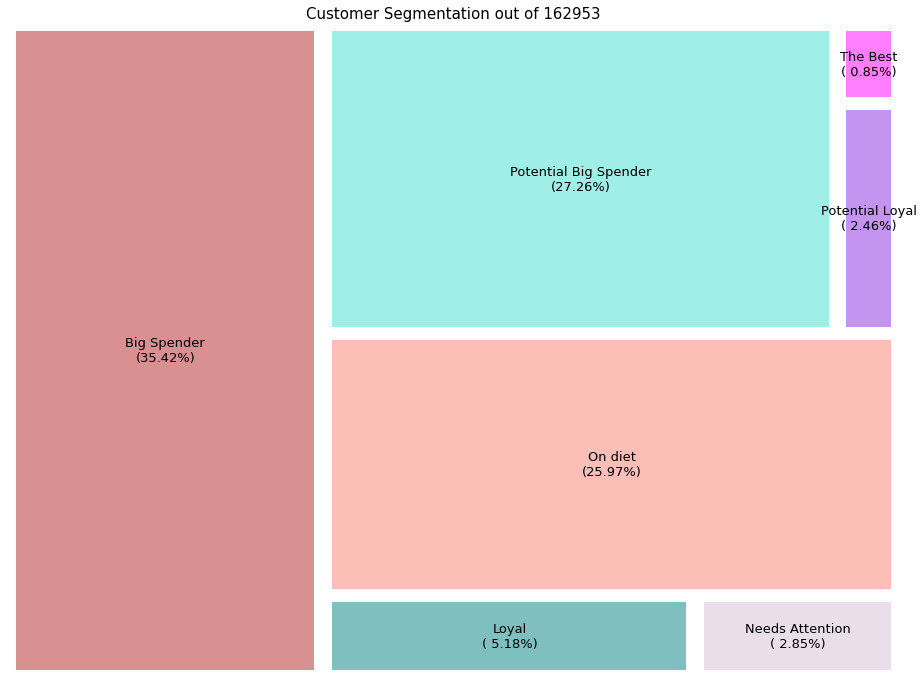

In [18]:
total_users = data.shape[0]
labels = [
    f"{segment}\n({row['users_count']/total_users*100:5.2f}%)"
    for segment, row in aggregated_data.iterrows()
]
squarify.plot(aggregated_data['users_count'], 
              label=labels, 
              pad=True,
              alpha=0.5,
              color=['firebrick', 'teal', 'thistle', 'salmon', 'turquoise', 'blueviolet', 'magenta'],
             text_kwargs={'fontsize':13})
plt.title(f'Customer Segmentation out of {data.shape[0]}', fontsize=15)
plt.axis('off')
plt.show()